# 데이콘 버스 운행시간 예측 경진대회

* https://dacon.io/competitions/official/229611/overview/description

## 라이브러리 및 데이터 확인

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# date, route_id, vh_id, route_nm은 삭제해도 될 것 같은데
train = pd.read_csv("bus/train.csv", index_col="id")
print(train.shape)
train.head(2)

(210457, 13)


,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
id,,,,,,,,,,,,,
0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36


In [3]:
train.describe()

,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time
count,2.104570e+05,2.104570e+05,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000
mean,4.052491e+08,7.988694e+06,33.434528,126.603451,490.256100,33.434711,126.603687,85.380824
std,9.132404e+04,6.774077e+03,0.102350,0.123961,520.563932,0.102224,0.123838,85.051170
min,4.051360e+08,7.983000e+06,33.244382,126.473300,97.000000,33.244382,126.473300,6.000000
25%,4.051365e+08,7.983093e+06,33.325283,126.523900,291.000000,33.325283,126.524550,44.000000
50%,4.053201e+08,7.983431e+06,33.484667,126.551050,384.000000,33.484860,126.551050,66.000000
75%,4.053201e+08,7.997041e+06,33.500197,126.650322,542.000000,33.500228,126.650322,102.000000
max,4.053281e+08,7.997124e+06,33.556167,126.935188,7461.000000,33.556167,126.935188,2996.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210457 entries, 0 to 210456
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              210457 non-null  object 
 1   route_id          210457 non-null  int64  
 2   vh_id             210457 non-null  int64  
 3   route_nm          210457 non-null  object 
 4   now_latitude      210457 non-null  float64
 5   now_longitude     210457 non-null  float64
 6   now_station       210457 non-null  object 
 7   now_arrive_time   210457 non-null  object 
 8   distance          210457 non-null  float64
 9   next_station      210457 non-null  object 
 10  next_latitude     210457 non-null  float64
 11  next_longitude    210457 non-null  float64
 12  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 22.5+ MB


In [5]:
test = pd.read_csv("bus/test.csv", index_col="id")
print(test.shape)
test.head()

(91774, 12)


,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
id,,,,,,,,,,,,
210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355


In [6]:
set(train.columns) - set(test.columns)

{'next_arrive_time'}

In [7]:
train["route_nm"].unique()

array(['360-1', '360-2', '360-7', '360-12', '365-21', '365-22', '201-11',
       '201-12', '201-13', '201-14', '201-15', '201-16', '201-17',
       '201-18', '201-21', '201-22', '201-24', '201-26', '201-27',
       '281-1', '281-2'], dtype=object)

In [8]:
train["date"].unique()

array(['2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18',
       '2019-10-19', '2019-10-20', '2019-10-21', '2019-10-22',
       '2019-10-23', '2019-10-24', '2019-10-25', '2019-10-26',
       '2019-10-27', '2019-10-28'], dtype=object)

In [9]:
train.columns

Index(['date', 'route_id', 'vh_id', 'route_nm', 'now_latitude',
       'now_longitude', 'now_station', 'now_arrive_time', 'distance',
       'next_station', 'next_latitude', 'next_longitude', 'next_arrive_time'],
      dtype='object')

In [10]:
# 뒤에서 필요 없는 데이터는 한번에 빼기로
# train.drop(["route_nm", "vh_id", "now_station", "next_station"], axis=1, inplace=True)

In [11]:
# train.head()

,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
id,,,,,,,,,,,,,
0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64


## log

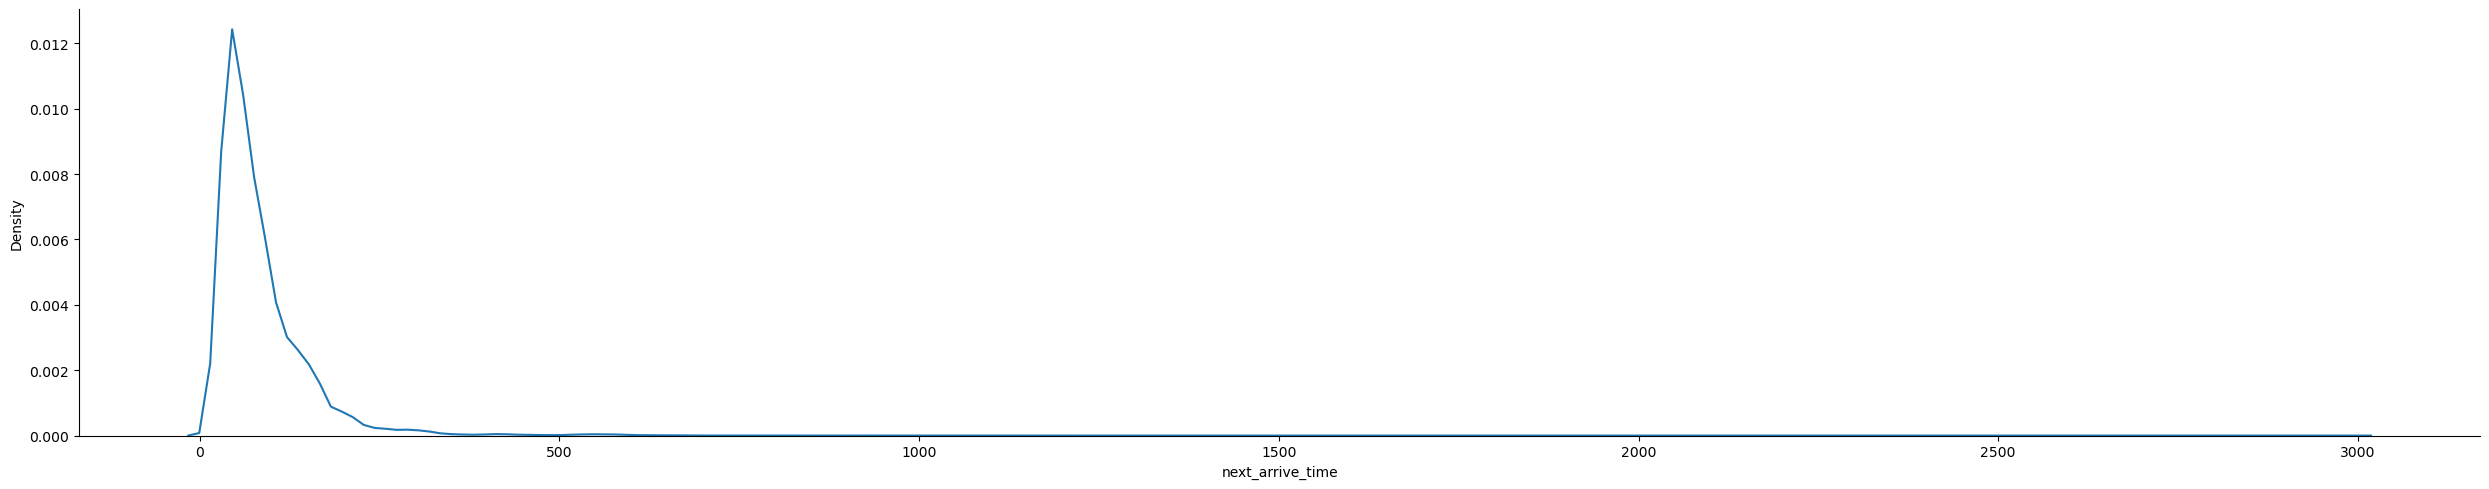

In [12]:
sns.displot(data=train, x="next_arrive_time", aspect=5, kind="kde")
plt.show()

In [13]:
# 첨도>3 뾰족
print("왜도(Skewness):", train["next_arrive_time"].skew())
print("첨도(Kurtosis):", train["next_arrive_time"].kurtosis())

왜도(Skewness): 11.332142001311919
첨도(Kurtosis): 257.4816986235605


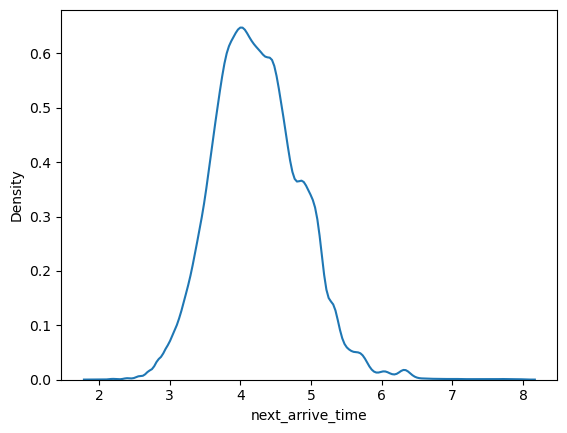

In [14]:
sns.kdeplot(np.log1p(train["next_arrive_time"]))
plt.show()

In [15]:
train["next_arrive_time_log1p"] = np.log1p(train["next_arrive_time"])

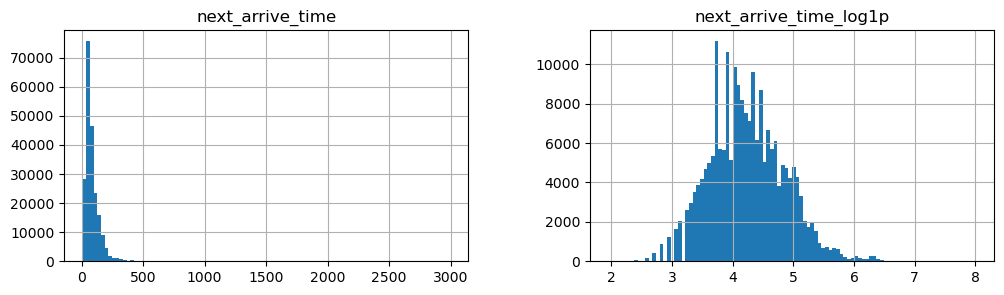

In [16]:
train[["next_arrive_time", "next_arrive_time_log1p"]].hist(figsize=(12,3), bins=100)
plt.show()

## 결측치, 상관관계

In [17]:
train.isnull().sum()

date                      0
route_id                  0
vh_id                     0
route_nm                  0
now_latitude              0
now_longitude             0
now_station               0
now_arrive_time           0
distance                  0
next_station              0
next_latitude             0
next_longitude            0
next_arrive_time          0
next_arrive_time_log1p    0
dtype: int64

In [18]:
test.isnull().sum()

date               0
route_id           0
vh_id              0
route_nm           0
now_latitude       0
now_longitude      0
now_station        0
now_arrive_time    0
distance           0
next_station       0
next_latitude      0
next_longitude     0
dtype: int64

In [19]:
# next_arrive_time이랑 상관관계가 높은게 별로 없는데..?
train.corr()

,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time,next_arrive_time_log1p
route_id,1.000000,-0.998641,-0.432923,0.555106,0.104704,-0.431895,0.552970,-0.157622,-0.229760
vh_id,-0.998641,1.000000,0.421832,-0.579469,-0.098819,0.420799,-0.577379,0.161960,0.235549
now_latitude,-0.432923,0.421832,1.000000,-0.083973,-0.034868,0.998971,-0.085858,0.101329,0.168542
now_longitude,0.555106,-0.579469,-0.083973,1.000000,0.094554,-0.082066,0.999531,-0.115282,-0.169114
distance,0.104704,-0.098819,-0.034868,0.094554,1.000000,-0.031449,0.094033,0.437166,0.423404
next_latitude,-0.431895,0.420799,0.998971,-0.082066,-0.031449,1.000000,-0.083894,0.103378,0.170108
next_longitude,0.552970,-0.577379,-0.085858,0.999531,0.094033,-0.083894,1.000000,-0.115154,-0.169055
next_arrive_time,-0.157622,0.161960,0.101329,-0.115282,0.437166,0.103378,-0.115154,1.000000,0.770045
next_arrive_time_log1p,-0.229760,0.235549,0.168542,-0.169114,0.423404,0.170108,-0.169055,0.770045,1.000000


In [ ]:
# sns.pairplot(train, corner=True)
# plt.show()

## 인코딩

In [21]:
train["bus_group"]="group"

train.loc[(train["route_nm"].str.contains("360")), ["bus_group"]]="360"
train.loc[(train["route_nm"].str.contains("365")), ["bus_group"]]="365"
train.loc[(train["route_nm"].str.contains("201")), ["bus_group"]]="201"
train.loc[(train["route_nm"].str.contains("281")), ["bus_group"]]="281"

In [22]:
train["bus_group"]

id
0         360
1         360
2         360
3         360
4         360
         ... 
210452    281
210453    281
210454    281
210455    281
210456    281
Name: bus_group, Length: 210457, dtype: object

In [23]:
train = pd.get_dummies(train, columns=["bus_group"])

In [24]:
test["bus_group"]="group"

test.loc[(test["route_nm"].str.contains("360")), ["bus_group"]]="360"
test.loc[(test["route_nm"].str.contains("365")), ["bus_group"]]="365"
test.loc[(test["route_nm"].str.contains("201")), ["bus_group"]]="201"
test.loc[(test["route_nm"].str.contains("281")), ["bus_group"]]="281"

test = pd.get_dummies(test, columns=["bus_group"])

In [25]:
train["date"] = pd.to_datetime(train["date"])
train["date"].head()

id
0   2019-10-15
1   2019-10-15
2   2019-10-15
3   2019-10-15
4   2019-10-15
Name: date, dtype: datetime64[ns]

In [26]:
test["date"] = pd.to_datetime(test["date"])
test["date"].head()

id
210457   2019-10-29
210458   2019-10-29
210459   2019-10-29
210460   2019-10-29
210461   2019-10-29
Name: date, dtype: datetime64[ns]

In [27]:
train["weekday"]=train["date"].dt.weekday
train["weekday"].head()

id
0    1
1    1
2    1
3    1
4    1
Name: weekday, dtype: int64

In [28]:
train = pd.get_dummies(train, columns=["weekday"])

In [29]:
test["weekday"] = test["date"].dt.weekday
test = pd.get_dummies(test, columns=["weekday"])

In [30]:
train["now_arrive_time"]

id
0         06시
1         06시
2         06시
3         06시
4         07시
         ... 
210452    21시
210453    21시
210454    21시
210455    21시
210456    21시
Name: now_arrive_time, Length: 210457, dtype: object

In [ ]:
# df_train['time_group']='group' #time_group 변수를 미리 생성

# df_train.loc[ (df_train['now_arrive_time']&gt;='05시') & (df_train['now_arrive_time']&lt;'07시') ,['time_group'] ]= 'morning_1' # 5~6시
# df_train.loc[ (df_train['now_arrive_time']&gt;='07시') & (df_train['now_arrive_time']&lt;'09시') ,['time_group'] ]= 'morning_2' # 7~8시
# df_train.loc[ (df_train['now_arrive_time']&gt;='09시') & (df_train['now_arrive_time']&lt;'11시') ,['time_group'] ]= 'afternoon_1' # 9~10시
# df_train.loc[ (df_train['now_arrive_time']&gt;='11시') & (df_train['now_arrive_time']&lt;'13시') ,['time_group'] ]= 'afternoon_2' # 11~12시
# df_train.loc[ (df_train['now_arrive_time']&gt;='13시') & (df_train['now_arrive_time']&lt;'15시') ,['time_group'] ]= 'afternoon_3' #13~14시
# df_train.loc[ (df_train['now_arrive_time']&gt;='15시') & (df_train['now_arrive_time']&lt;'17시') ,['time_group'] ]= 'evening_1' #15~16시
# df_train.loc[ (df_train['now_arrive_time']&gt;='17시') & (df_train['now_arrive_time']&lt;'19시') ,['time_group'] ]= 'evening_2' #17~18시
# df_train.loc[ (df_train['now_arrive_time']&gt;='19시') & (df_train['now_arrive_time']&lt;'21시'),['time_group'] ]= 'evening_3' #19~20시
# df_train.loc[ (df_train['now_arrive_time']&gt;='21시') & (df_train['now_arrive_time']&lt;'23시'),['time_group'] ]= 'night_1' #21~22시
# df_train.loc[ (df_train['now_arrive_time']&gt;='23시') | (df_train['now_arrive_time']=='00시'),['time_group'] ]= 'night_2' #23~00시

# df_train = pd.get_dummies(df_train,columns=['time_group'])

## feature, label

In [31]:
label_name = "next_arrive_time_log1p"
label_name

'next_arrive_time_log1p'

In [32]:
train.columns

Index(['date', 'route_id', 'vh_id', 'route_nm', 'now_latitude',
       'now_longitude', 'now_station', 'now_arrive_time', 'distance',
       'next_station', 'next_latitude', 'next_longitude', 'next_arrive_time',
       'next_arrive_time_log1p', 'bus_group_201', 'bus_group_281',
       'bus_group_360', 'bus_group_365', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210457 entries, 0 to 210456
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    210457 non-null  datetime64[ns]
 1   route_id                210457 non-null  int64         
 2   vh_id                   210457 non-null  int64         
 3   route_nm                210457 non-null  object        
 4   now_latitude            210457 non-null  float64       
 5   now_longitude           210457 non-null  float64       
 6   now_station             210457 non-null  object        
 7   now_arrive_time         210457 non-null  object        
 8   distance                210457 non-null  float64       
 9   next_station            210457 non-null  object        
 10  next_latitude           210457 non-null  float64       
 11  next_longitude          210457 non-null  float64       
 12  next_arrive_time        210457

In [35]:
train["now_arrive_time"] = train["now_arrive_time"].str[:2]
test["now_arrive_time"] = test["now_arrive_time"].str[:2]
train["now_arrive_time"] = train["now_arrive_time"].astype("int")
test["now_arrive_time"] = test["now_arrive_time"].astype("int")

AttributeError: Can only use .str accessor with string values!

In [36]:
feature_names = ['route_id', 'now_arrive_time', 'distance',
       'next_latitude', 'next_longitude', 
       'bus_group_201', 'bus_group_281', 'bus_group_360', 'bus_group_365',
       'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']

In [37]:
train.shape, test.shape

((210457, 25), (91774, 23))

In [41]:
X_train = pd.get_dummies(train[feature_names])
print(X_train.shape)
X_train.head()

(210457, 16)


,route_id,now_arrive_time,distance,next_latitude,next_longitude,bus_group_201,bus_group_281,bus_group_360,bus_group_365,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
id,,,,,,,,,,,,,,,,
0,405136001,6,266.0,33.457724,126.554014,0,0,1,0,0,1,0,0,0,0,0
1,405136001,6,333.0,33.458783,126.557353,0,0,1,0,0,1,0,0,0,0,0
2,405136001,6,415.0,33.459893,126.561624,0,0,1,0,0,1,0,0,0,0,0
3,405136001,6,578.0,33.484860,126.542928,0,0,1,0,0,1,0,0,0,0,0
4,405136001,7,374.0,33.485822,126.490897,0,0,1,0,0,1,0,0,0,0,0


In [42]:
X_test = pd.get_dummies(test[feature_names])
print(X_test.shape)
X_test.head()

(91774, 16)


,route_id,now_arrive_time,distance,next_latitude,next_longitude,bus_group_201,bus_group_281,bus_group_360,bus_group_365,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
id,,,,,,,,,,,,,,,,
210457,405136001,7,333.0,33.458783,126.557353,0,0,1,0,0,1,0,0,0,0,0
210458,405136001,7,415.0,33.459893,126.561624,0,0,1,0,0,1,0,0,0,0,0
210459,405136001,8,417.0,33.478850,126.488350,0,0,1,0,0,1,0,0,0,0,0
210460,405136001,8,334.0,33.480700,126.489933,0,0,1,0,0,1,0,0,0,0,0
210461,405136001,8,550.0,33.482077,126.485355,0,0,1,0,0,1,0,0,0,0,0


In [43]:
y_train = train[label_name]
print(y_train.shape)
y_train.head(2)

(210457,)


id
0    3.218876
1    3.610918
Name: next_arrive_time_log1p, dtype: float64

## 모델

In [44]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model

RandomForestRegressor(random_state=42)

In [45]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [46]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=kf, n_jobs=-1)
y_valid_predict[:10]

array([3.29013688, 3.57973807, 3.69246798, 4.09344142, 4.12840267,
       4.57916345, 3.95379581, 3.98990729, 5.28082774, 4.88077206])

In [52]:
rmse = (((y_train-y_valid_predict)**2).mean()**0.5)
rmse

0.3570515108271684

In [49]:
y_predict = model.fit(X_train, y_train).predict(X_test)
y_predict[:10]

array([3.63999327, 3.71949325, 4.96324797, 4.03741726, 4.99563575,
       3.29598941, 4.2050714 , 5.0728423 , 4.74165458, 4.66742168])

## 제출

In [54]:
submit = pd.read_csv("bus/submission_제출양식.csv")
submit.head(2)

,id,next_arrive_time
0,210457,0
1,210458,0


In [55]:
submit["next_arrive_time"] = np.expm1(y_predict)
submit.head(2)

,id,next_arrive_time
0,210457,37.091580
1,210458,40.243489


In [56]:
file_name = f"bus/submission_{rmse:.5f}.csv"
file_name

'bus/submission_0.35705.csv'

In [57]:
submit.to_csv(file_name, index=False)

In [58]:
pd.read_csv(file_name)

,id,next_arrive_time
0,210457,37.091580
1,210458,40.243489
2,210459,142.057690
3,210460,55.679765
4,210461,146.766859
...,...,...
91769,302350,98.941889
91770,302351,68.429049
91771,302352,105.056537
91772,302353,23.397201


## feature_names 변경

In [84]:
feature_names = ['route_id', 'now_arrive_time', 'distance',
       'bus_group_201', 'bus_group_281', 'bus_group_360', 'bus_group_365',
       'weekday_0', 'weekday_1']

In [85]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": np.random.randint(15, 30, 10), 
                       "max_features": np.random.uniform(0.8, 1, 10)}

reg = RandomizedSearchCV(model, 
                         param_distributions=param_distributions, 
                         scoring="neg_root_mean_squared_error",
                         n_iter=10, cv=5, n_jobs=-1,
                         verbose=2, random_state=42)
reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([24, 15, 20, 19, 23, 17, 28, 20, 20, 15]),
                                        'max_features': array([0.82181233, 0.89881599, 0.94805775, 0.91486197, 0.9958449 ,
       0.91231607, 0.89463397, 0.89260019, 0.85509298, 0.87536098])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [108]:
best_model = reg.best_estimator_
best_model

RandomForestRegressor(max_depth=15, max_features=0.8218123296582345,
                      random_state=42)

In [110]:
y_valid_pred = cross_val_predict(best_model, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_valid_pred[:10]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


array([3.80059133, 4.12786746, 3.80277388, 4.2064739 , 4.24522911,
       3.47218573, 4.52111768, 4.06725123, 3.94672675, 4.96460073])

In [112]:
rmse = (((y_train-y_valid_pred)**2).mean()**0.5)
rmse

0.374962424368189

## feature_names변경, XG부스트

In [59]:
feature_names = ['route_id', 'now_arrive_time', 'distance',
       'bus_group_201', 'bus_group_281', 'bus_group_360', 'bus_group_365',
       'weekday_0', 'weekday_1']

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2 ,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168365, 9), (42092, 9), (168365,), (42092,))

In [101]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_xgb_train = le.fit_transform(y_train)
y_xgb_test = le.fit_transform(y_test)
X_train.shape, y_xgb_train.shape, y_test.shape, y_xgb_test.shape

((168365, 9), (168365,), (42092,), (42092,))

In [115]:
from xgboost.sklearn import XGBRegressor

xgb=XGBRegressor()
xgb.fit(X_train, y_xgb_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [116]:
y_xgb_predict = xgb.predict(X_test)
y_xgb_predict

array([18.833515, 31.906925, 69.10008 , ..., 11.94605 , 29.37337 ,
       32.20346 ], dtype=float32)

In [119]:
# 실패.. 음수를 없앨 수 있게 log를 취해주거나, 최소값을 더해주는 등의 처리가 필요할 것 같다.
from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt(mean_squared_log_error(y_test, y_xgb_predict))
RMSLE

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [117]:
xgb_score = (y_xgb_predict == y_xgb_test).mean()
xgb_score

0.0

## 그라디언트부스트

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbt = GradientBoostingRegressor(random_state=42)
model_gbt

GradientBoostingRegressor(random_state=42)

In [78]:
gbt_score = model_gbt.score(X_train, y_train)
gbt_score

0.5001283156505691

In [73]:
gbt_predict = model_gbt.fit(X_train, y_train).predict(X_test)
gbt_predict

array([4.1646781 , 4.34500174, 4.52219023, ..., 4.27440256, 3.43951691,
       4.5371601 ])

In [74]:
submit = pd.read_csv("bus/submission_제출양식.csv")
submit.head(2)

,id,next_arrive_time
0,210457,0
1,210458,0


In [75]:
submit["next_arrive_time"] = np.expm1(gbt_predict)
submit.head(2)

,id,next_arrive_time
0,210457,63.371958
1,210458,76.092171


In [79]:
file_name = f"bus/gbt_submission_{gbt_score:.5f}.csv"
file_name

'bus/gbt_submission_0.50013.csv'